# PREDICTION OF FOREX PRICES  USING THE CNN-LSTM 
# CURRENCY PAIR: USDJPY

IMPORTING REQUIRED PYTHON LYBRARIES AND SETTING DESIRED PLOTTING STYLE

In [38]:
import numpy as np
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt 
import os
plt.style.use('seaborn-whitegrid')
#plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')

IMPORTING HISTORY DATASETS OF EUR VS USD FOREX

In [2]:
#df=yf.download(tickers='USDJPY=X',start='2003-12-31',interval ='1d')

In [3]:
#df.to_csv("USDJPY_csv")

In [39]:
url = r"USDJPY_csv"
## Read dataset to pandas dataframe
df = pd.read_csv(url, index_col = 'Date')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-30,107.070000,107.160004,106.860001,106.959999,106.959999,0
2003-12-31,106.959999,107.680000,106.760002,107.400002,107.400002,0
2004-01-01,106.949997,107.470001,106.949997,107.300003,107.300003,0
2004-01-02,107.320000,107.489998,106.730003,106.910004,106.910004,0
2004-01-05,106.930000,107.320000,106.010002,106.239998,106.239998,0


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,105.542999,105.835999,105.000000,105.514000,105.514000,0
2021-02-23,105.012001,105.411003,104.900002,104.984001,104.984001,0
2021-02-24,105.287003,106.094002,105.267998,105.282997,105.282997,0
2021-02-25,105.945999,106.286003,105.855003,105.944000,105.944000,0
2021-02-26,106.389999,106.681999,105.857002,106.378998,106.378998,0


In [7]:
#get the number of rows and columns in the data set
df.shape

(4430, 6)

PREDICTION IS DONE USING CLOSING PRICE ONLY, SO TAKING OUT ONLY THE CLOSE PRICES

In [40]:
data = df.filter(['Close']).values
data

array([[106.95999908],
       [107.40000153],
       [107.30000305],
       ...,
       [105.28299713],
       [105.94400024],
       [106.3789978 ]])

PLOTTING THE CLOSE PRICES OF HISTORY DATASETS

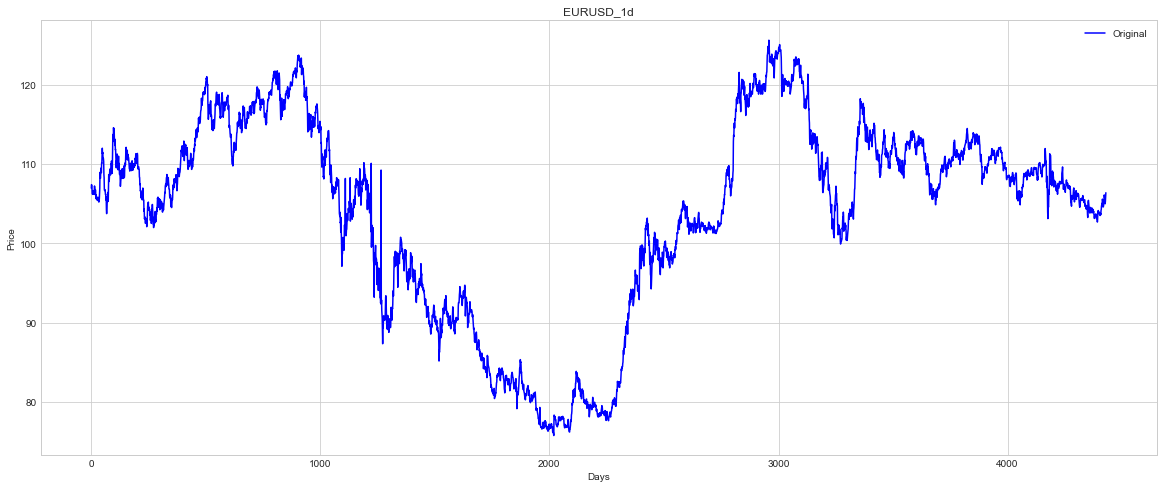

In [9]:
plt.figure(figsize = (20,8))
plt.plot(data,'b',label = 'Original')
plt.xlabel("Days")
plt.ylabel('Price')
plt.title("EURUSD_1d")
plt.legend()

DATA PREPROCESSING USING SCIKIT LEARN PYTHON LIBRARY

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.62578928],
       [0.63460891],
       [0.63260449],
       ...,
       [0.59217461],
       [0.60542409],
       [0.6141434 ]])

DATA SPLITTING INTO TRAINING, AND TESTING DATA SETS

In [42]:
training_size = int(len(scaled_data)*0.80) #Training size is 80% of the given data
print("Training_size:",training_size)
x_train_1 = scaled_data[0:training_size,:]
print(len(x_train_1))
test_data_1= scaled_data[training_size:,:1]
print(len(test_data_1))

Training_size: 3544
3544
886


In [13]:
print(len(x_train_1)), print(test_data_1)

3544
[[0.65870231]
 [0.66936609]
 [0.65204752]
 [0.65126591]
 [0.67459758]
 [0.69125459]
 [0.69704748]
 [0.68510094]
 [0.71071781]
 [0.71671119]
 [0.71835485]
 [0.73775782]
 [0.73587375]
 [0.73571333]
 [0.72202297]
 [0.73437032]
 [0.74405185]
 [0.73617441]
 [0.73960197]
 [0.74224777]
 [0.7438113 ]
 [0.74331015]
 [0.74232805]
 [0.73785814]
 [0.74000279]
 [0.73372895]
 [0.73551284]
 [0.73160417]
 [0.72444839]
 [0.73072224]
 [0.731083  ]
 [0.74711866]
 [0.74044384]
 [0.76786463]
 [0.75367312]
 [0.76582015]
 [0.75804287]
 [0.7693881 ]
 [0.76167092]
 [0.74677793]
 [0.75988702]
 [0.76994934]
 [0.76722326]
 [0.77047052]
 [0.76231245]
 [0.76211196]
 [0.76543936]
 [0.75437476]
 [0.76060853]
 [0.75858408]
 [0.75491597]
 [0.74741931]
 [0.7275753 ]
 [0.73785814]
 [0.73364881]
 [0.71304307]
 [0.71186033]
 [0.72021888]
 [0.7101766 ]
 [0.71975796]
 [0.72685364]
 [0.73795831]
 [0.74413198]
 [0.73681579]
 [0.73611415]
 [0.73264653]
 [0.7503257 ]
 [0.75774222]
 [0.75768212]
 [0.75778228]
 [0.74248832]
 

(None, None)

In [43]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
       # find the end of this pattern
       end_ix = i + n_steps
       # check if we are beyond the sequence
       if end_ix > len(sequence)-1:
          break
       # gather input and output parts of the pattern
       seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
       X.append(seq_x)
       y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
#Split into samples
time_step = 120
x_train, y_train = split_sequence(x_train_1, time_step)
x_test, y_test = split_sequence(test_data_1, time_step)


In [16]:
print(x_train.shape),print(y_train.shape)

(3424, 120, 1)
(3424, 1)


(None, None)

In [17]:
print(x_test[-1]), print(y_test[-2:])

[[0.60941289]
 [0.60945296]
 [0.60083382]
 [0.59413897]
 [0.58774477]
 [0.5804486 ]
 [0.57722153]
 [0.58028833]
 [0.58718352]
 [0.59259562]
 [0.59522139]
 [0.59800757]
 [0.59518132]
 [0.59981165]
 [0.59554207]
 [0.59738623]
 [0.59672482]
 [0.60067355]
 [0.59933055]
 [0.60584495]
 [0.60690733]
 [0.59917028]
 [0.5932971 ]
 [0.59592302]
 [0.58928826]
 [0.59371811]
 [0.59506112]
 [0.59592302]
 [0.59606325]
 [0.58000771]
 [0.58491851]
 [0.58014795]
 [0.58313462]
 [0.57738179]
 [0.57277165]
 [0.57756225]
 [0.57808343]
 [0.58098981]
 [0.57740183]
 [0.57523714]
 [0.55849985]
 [0.55148431]
 [0.5892482 ]
 [0.59171369]
 [0.59482056]
 [0.58830601]
 [0.58000771]
 [0.57730166]
 [0.57008563]
 [0.56433281]
 [0.56294973]
 [0.56278946]
 [0.57698097]
 [0.57674042]
 [0.57447541]
 [0.57130828]
 [0.56810124]
 [0.57245096]
 [0.57265129]
 [0.57563796]
 [0.56290966]
 [0.57042635]
 [0.56641751]
 [0.56916363]
 [0.57190975]
 [0.57010566]
 [0.56523492]
 [0.56665807]
 [0.55912135]
 [0.55593419]
 [0.54903884]
 [0.55

(None, None)

In [45]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [19]:
x_train.shape, x_test.shape

((3424, 120, 1), (766, 120, 1))

BUILDING A CNN-LSTM MODEL USING KERAS

In [20]:
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D ,MaxPooling1D, Dropout
from keras.layers.recurrent import LSTM
from keras.utils.vis_utils import plot_model
from keras.metrics import RootMeanSquaredError as rmse
from keras import optimizers

In [21]:
# define model
model = Sequential()
model.add(Conv1D(filters=250, kernel_size=2, activation='relu',padding = 'same',input_shape=(120,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss= 'mse' , metrics = [rmse()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 120, 250)          750       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 250)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 60, 100)           140400    
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

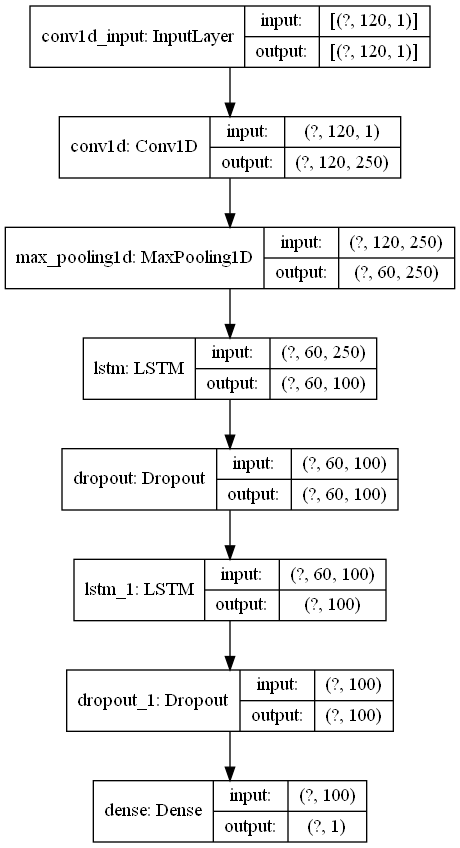

In [22]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

TRAINING THE MODEL FOR 200 EPOCHS

In [23]:
history = model.fit(x_train, y_train, epochs = 250, validation_data = (x_test,y_test), batch_size=32, verbose=1)

Epoch 1/250
107/107 [==============================] - 17s 160ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 2/250
107/107 [==============================] - 16s 147ms/step - loss: 0.0020 - root_mean_squared_error: 0.0448 - val_loss: 4.5966e-04 - val_root_mean_squared_error: 0.0214
Epoch 3/250
107/107 [==============================] - 13s 126ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 3.0927e-04 - val_root_mean_squared_error: 0.0176
Epoch 4/250
107/107 [==============================] - 14s 127ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 2.7526e-04 - val_root_mean_squared_error: 0.0166
Epoch 5/250
107/107 [==============================] - 15s 138ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 4.0787e-04 - val_root_mean_squared_error: 0.0202
Epoch 6/250
107/107 [==============================] - 14s 127ms/step - loss: 9.6313e-04 - root_mean_squ

Epoch 89/250
107/107 [==============================] - 19s 175ms/step - loss: 4.5479e-04 - root_mean_squared_error: 0.0213 - val_loss: 1.5442e-04 - val_root_mean_squared_error: 0.0124
Epoch 90/250
107/107 [==============================] - 18s 171ms/step - loss: 4.5919e-04 - root_mean_squared_error: 0.0214 - val_loss: 1.4526e-04 - val_root_mean_squared_error: 0.0121
Epoch 91/250
107/107 [==============================] - 19s 182ms/step - loss: 4.4131e-04 - root_mean_squared_error: 0.0210 - val_loss: 9.2292e-05 - val_root_mean_squared_error: 0.0096 - loss: 4.6050e-04 - root_mean_squared_error: 0.021 - ETA: 5s - loss: 4.5761e-
Epoch 92/250
107/107 [==============================] - 22s 210ms/step - loss: 4.7312e-04 - root_mean_squared_error: 0.0218 - val_loss: 2.0839e-04 - val_root_mean_squared_error: 0.0144
Epoch 93/250
107/107 [==============================] - 19s 179ms/step - loss: 4.5399e-04 - root_mean_squared_error: 0.0213 - val_loss: 9.0951e-05 - val_root_mean_squared_error: 0.0

Epoch 143/250
107/107 [==============================] - 15s 140ms/step - loss: 4.1038e-04 - root_mean_squared_error: 0.0203 - val_loss: 9.0139e-05 - val_root_mean_squared_error: 0.0095
Epoch 144/250
107/107 [==============================] - 14s 135ms/step - loss: 3.9587e-04 - root_mean_squared_error: 0.0199 - val_loss: 9.6223e-05 - val_root_mean_squared_error: 0.0098
Epoch 149/250
107/107 [==============================] - 14s 134ms/step - loss: 4.4644e-04 - root_mean_squared_error: 0.0211 - val_loss: 9.7344e-05 - val_root_mean_squared_error: 0.0099
Epoch 150/250
107/107 [==============================] - 15s 136ms/step - loss: 4.2740e-04 - root_mean_squared_error: 0.0207 - val_loss: 1.1875e-04 - val_root_mean_squared_error: 0.0109
Epoch 151/250
107/107 [==============================] - 15s 137ms/step - loss: 4.3725e-04 - root_mean_squared_error: 0.0209 - val_loss: 1.6503e-04 - val_root_mean_squared_error: 0.0128
Epoch 152/250
107/107 [==============================] - 14s 134ms/ste

107/107 [==============================] - 17s 162ms/step - loss: 4.0824e-04 - root_mean_squared_error: 0.0202 - val_loss: 9.5802e-05 - val_root_mean_squared_error: 0.0098
Epoch 192/250
107/107 [==============================] - 18s 164ms/step - loss: 4.1936e-04 - root_mean_squared_error: 0.0205 - val_loss: 1.4189e-04 - val_root_mean_squared_error: 0.0119
Epoch 193/250
107/107 [==============================] - 18s 165ms/step - loss: 4.2350e-04 - root_mean_squared_error: 0.0206 - val_loss: 1.7926e-04 - val_root_mean_squared_error: 0.0134
Epoch 194/250
107/107 [==============================] - 17s 163ms/step - loss: 4.1272e-04 - root_mean_squared_error: 0.0203 - val_loss: 9.8218e-05 - val_root_mean_squared_error: 0.0099
Epoch 195/250
107/107 [==============================] - 18s 173ms/step - loss: 4.1149e-04 - root_mean_squared_error: 0.0203 - val_loss: 1.1142e-04 - val_root_mean_squared_error: 0.0106
Epoch 196/250
107/107 [==============================] - 19s 174ms/step - loss: 4.32

MODEL EVALUATION

In [24]:
history.history.keys()


dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

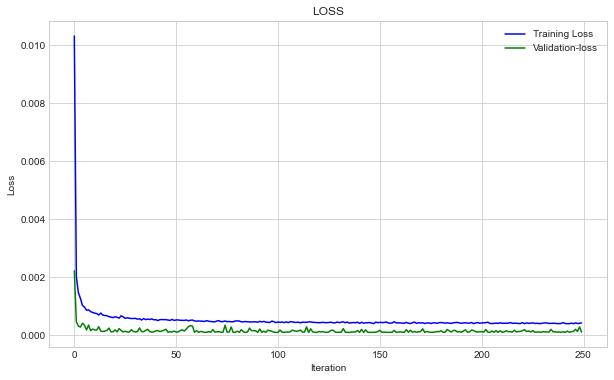

In [25]:
### Plotting iteration-loss graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'],label='Training Loss',color='b')
plt.plot(history.history['val_loss'],label='Validation-loss',color='g')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title('LOSS')
plt.legend()

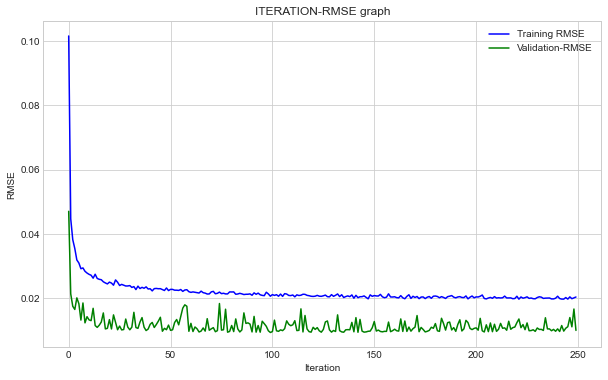

In [26]:
### Plotting iteration-rmse graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['root_mean_squared_error'],label='Training RMSE',color='b')
plt.plot(history.history['val_root_mean_squared_error'],label='Validation-RMSE',color='g')
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title('ITERATION-RMSE graph')
plt.legend()

In [27]:
#evaluate training data
model.evaluate(x_train,y_train, batch_size = 32)

107/107 [==============================] - 4s 42ms/step - loss: 2.3924e-04 - root_mean_squared_error: 0.0155: 2s - loss: 3.6790e-


[0.00023923604749143124, 0.015467257238924503]

In [28]:
#evaluate testing data
model.evaluate(x_test,y_test, batch_size = 32)

24/24 [==============================] - 1s 39ms/step - loss: 1.0161e-04 - root_mean_squared_error: 0.0101


[0.00010160876990994439, 0.010080117732286453]

PREDICTION USING TRAINING DATA

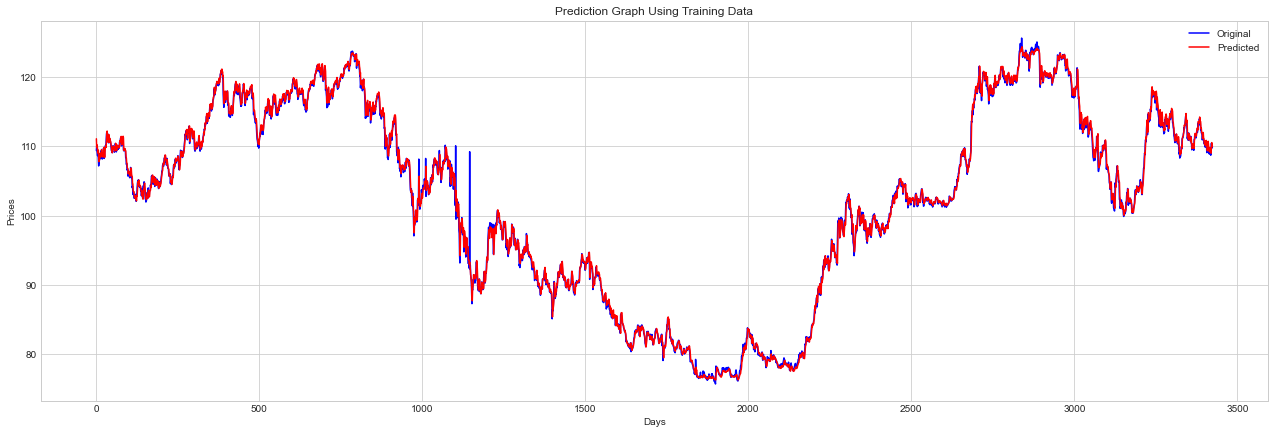

In [49]:
# prediction using training data
train_predict = model.predict(x_train)
plot_y_train = y_train.reshape(-1,1)

# Actual vs predicted training data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_train),color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(train_predict),color='red', label = 'Predicted')
plt.title("Prediction Graph Using Training Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()


PREDICTION USING TESTING DATA

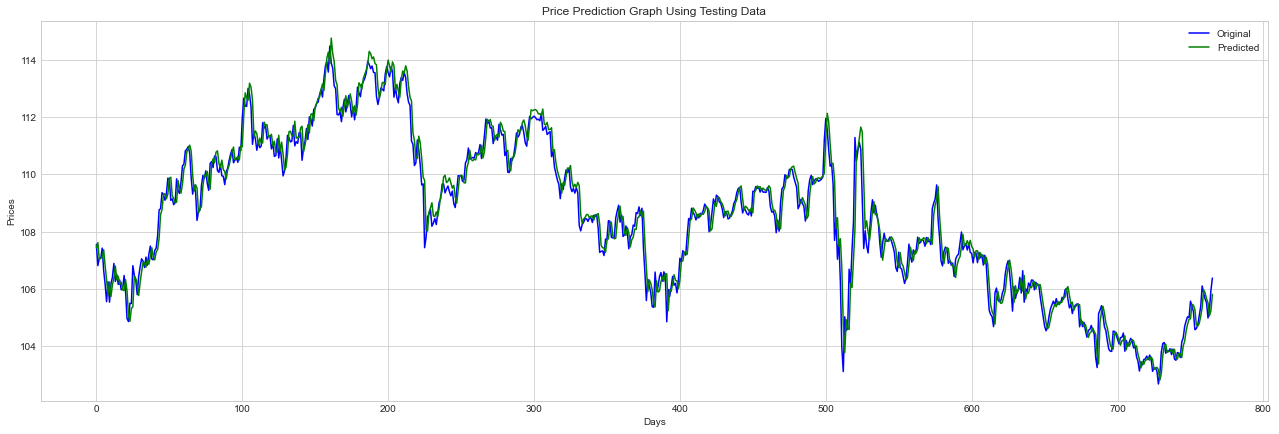

In [50]:
# prediction using testing data
test_predict = model.predict(x_test)
plot_y_test = y_test.reshape(-1,1)

# Actual vs predicted testing data graph
plt.figure(figsize=(22,7))
plt.plot(scaler.inverse_transform(plot_y_test),color = 'b',  label = 'Original')
plt.plot(scaler.inverse_transform(test_predict),color='g', label = 'Predicted')
plt.title("Price Prediction Graph Using Testing Data")
plt.xlabel("Days")
plt.ylabel('Prices')
plt.legend()
plt.show()

   COMPARING THE LAST 5 ACTUAL VALUES AND THE LAST 5 PREDICTED VALUES

In [31]:
last_actual_five = scaler.inverse_transform(y_test[-5:])
last_predicted_five = scaler.inverse_transform(test_predict[-5:])

In [32]:
compare = pd.DataFrame(last_actual_five, columns = ['Actual_Prices'])
compare['Predicted_Prices'] = last_predicted_five

In [33]:
print(compare)

   Actual_Prices  Predicted_Prices
0     105.514000        105.658424
1     104.984001        105.516815
2     105.282997        105.057228
3     105.944000        105.237869
4     106.378998        105.810768


VISUALIZATION OF THE GRAPH OF HISTORY DATA SETS WITH PREDICTION OF TRAINING AND TESTING DATA

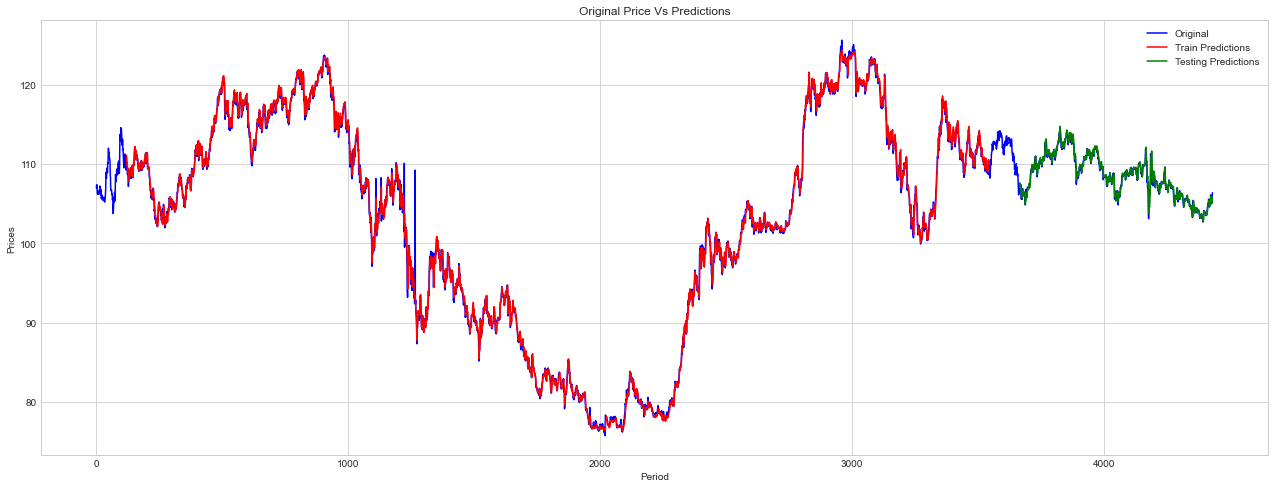

In [34]:
### Plotting 
# shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(data), :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(22,8))
plt.plot(data,color = 'b', label = 'Original')
plt.plot(scaler.inverse_transform(trainPredictPlot),color='red',label = 'Train Predictions')
plt.plot(scaler.inverse_transform(testPredictPlot),color='green', label = 'Testing Predictions')
plt.title("Original Price Vs Predictions")
plt.xlabel('Period')
plt.ylabel('Prices')
plt.legend()
plt.show()



SAVING MODELS FOR THE APPLICATION PURPOSES

In [35]:
model.save('usdjpy.h5')

In [46]:
#from keras.models import load_model

In [47]:
#model = load_model('usdjpy.h5')